<a href="https://colab.research.google.com/github/AnjanaAnoop/Bike-Sharing-Demand-Prediction/blob/main/Anjana_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Supervised ML - Regression
##### **Contribution**    - Individual
##### **Project done by**- Anjana K


# **Project Summary -**

The Seoul Bike Sharing Demand Prediction project aims to develop a robust regression model to accurately forecast daily bike rental demand in Seoul. This project involves analyzing a comprehensive dataset containing hourly rental records and various contextual features such as date, season, holiday status, working day status, weather conditions, temperature, humidity, and wind speed. The primary objectives include data exploration, feature engineering, model building, and performance evaluation. By leveraging advanced regression techniques, the goal is to create a reliable prediction model that can optimize the distribution of bikes, enhance operational efficiency, and improve user satisfaction. Accurate demand forecasting will enable better resource allocation, reduce operational costs, and provide insights for strategic planning in urban transportation. Ultimately, this project aims to support the sustainable growth of Seoul's bike-sharing program by ensuring the availability of bikes and enhancing the overall user experience.

# **GitHub Link -**

# **Problem Statement**


The Seoul Bike Sharing Demand Prediction project aims to develop a regression model to forecast daily bike rental demand. Accurate demand prediction is crucial for optimizing the operations of Seoul's bike-sharing program, ensuring bike availability, and enhancing user satisfaction. The project involves examining a dataset that includes hourly records of bike rentals along with various contextual attributes such as date, season, holiday status, working day status, weather conditions, temperature, humidity, and wind speed. The main objectives are to analyze the data, engineer meaningful features, build and compare various regression models, and evaluate their performance using appropriate metrics. The goal is to create a reliable model that can accurately predict bike rental demand, thereby helping to optimize bike distribution and resource allocation. This will improve operational efficiency, reduce costs, and provide a better experience for users. The project also aims to offer insights that can inform strategic decisions and policy-making for urban transportation planning in Seoul.

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

First, we import the libraries and modules which we have to use in this analysis.

In [4]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Dataset Loading

In [5]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [6]:
# Dataset First Look - Reading and viewing the csv file
df = pd.read_csv('/content/drive/MyDrive/Capstone Project Machine Learning/SeoulBikeData.csv', encoding='ISO-8859-1')

In [7]:
# First 5 rows of the dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# Last 5 rows of the dataset
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
row,column = df.shape
print("Total number of rows in dataset :",row)
print("Total number of columns in dataset :",column)

Total number of rows in dataset : 8760
Total number of columns in dataset : 14


### Dataset Information

In [10]:
# Dataset Info - To get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    8760
Name: count, dtype: int64

#### Missing Values/Null Values

In [12]:
#Checking for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

* There are 8760 rows and 14 columns in the given data.
* None of the columns have missing values.
* There are no duplicate entries in this dataset.
* All columns except 'Date' column have the correct datatypes.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
# Dataset Describe - To get some basic statistical details of the numerical columns
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

**The columns and the data it represents are listed below :**

1.   **Date** :  The date of each observation in the format 'year-month-day'

2.   **Rented Bike Count** : Count of bikes rented at each hour

3.   **Hour** : The hour of the day when the rental occurred

4.   **Temperature** : The temperature recorded in the city in Celsius(°C)

5.   **Humidity** :  Relative humidity in %

6.   **Windspeed** : Speed of the wind in m/s

7.   **Visibility** : Measure of distance at which object or light can be clearly discerned in units of 10m

8.   **Dew Point Temperature (dew_point_temp)** : Temperature recorded in the beginning of the day in Celsius(°C)

9.   **Solar Radiation (solar_radiation)** : Intensity of sunlight in MJ/m².

10.  **Rainfall** : The amount of rainfall in mm

11.  **Snowfall** : The amount of snowfall in cm

12.  **Seasons** : Season of the year (Winter, Spring, Summer, Autumn)

13.  **Holiday** : Whether the day is a Holiday or not (Holiday/No holiday)

14.  **Functional Day** : Whether the rental service is available (Yes-Functional hours) or not (No-Non functional hours)



### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for col in df.columns:
  if df[col].nunique()<500:
    print(f"The unique values in {col} column are :")
    print(df[col].unique())
    print('\n')

The unique values in Date column are :
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/201

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Making copy of the dataframe
bike_df = df.copy()

In [17]:
# Converting the datatype of Date column to datetime
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')

In [18]:
# Extracting Month,Weekday and Year from the date column
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Days_of_week']=bike_df['Date'].dt.day_name()
bike_df['Year']=bike_df['Date'].dt.year
bike_df['Day']=bike_df['Date'].dt.day

In [19]:
# The number of unique values in Date column
bike_df['Date'].nunique()

365

The dataset contains records of rented bikes per hour for a period of 365 days.

In [20]:
# The number of unique values in Year column
bike_df['Year'].value_counts()

Year
2018    8016
2017     744
Name: count, dtype: int64

Most of the records are from the year 2018.

In [21]:
# Finding the date of first and last entry in the dataset
print(f'The dataset contains observations from ',min(bike_df['Date']).date(),'to',max(bike_df['Date']).date())

The dataset contains observations from  2017-12-01 to 2018-11-30


In [22]:
# Creating a column which specifies  if the day is a Weekend('Y')or not ('N')
bike_df['Weekend']=bike_df['Days_of_week'].apply(lambda x : ('Y') if x in ['Saturday','Sunday'] else ('N'))

In [23]:
# Defining continuous independent variables separately
cont_var = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [24]:
# Defining dependent variable
dependent_variable = ['Rented Bike Count']

In [25]:
# Defining categorical independent variables separately
cat_var = ['Hour','Seasons', 'Holiday', 'Functioning Day', 'Month', 'Days_of_week', 'Weekend']

In [26]:
# Displaying the unique values in the categorical columns
# categorical_columns=['Seasons','Holiday', 'Functioning Day','Days_of_week','Weekend']

for col in cat_var:
  print(f'The unique values in the column {col} are {bike_df[col].unique()}')

The unique values in the column Hour are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The unique values in the column Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
The unique values in the column Holiday are ['No Holiday' 'Holiday']
The unique values in the column Functioning Day are ['Yes' 'No']
The unique values in the column Month are [12  1  2  3  4  5  6  7  8  9 10 11]
The unique values in the column Days_of_week are ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
The unique values in the column Weekend are ['N' 'Y']


In [27]:
# First 5 rows of the dataset
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Days_of_week,Year,Day,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,2017,1,N
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,2017,1,N
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,2017,1,N
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,2017,1,N
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,2017,1,N


### What all manipulations have you done and insights you found?

* The datatype of 'Date' column is corrected.

* From the 'Date' column, 'Month', 'Days_of_week', 'Year' and 'Day' columns are created.

* Created 'Weekend' column which specifies  if the day is a Weekend('Y')or not ('N').


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# ***Univariate Analysis***

#### Chart - 1 : Dependent variable Distribution

Text(0.5, 1.0, 'Distibution of Rented Bike Count')

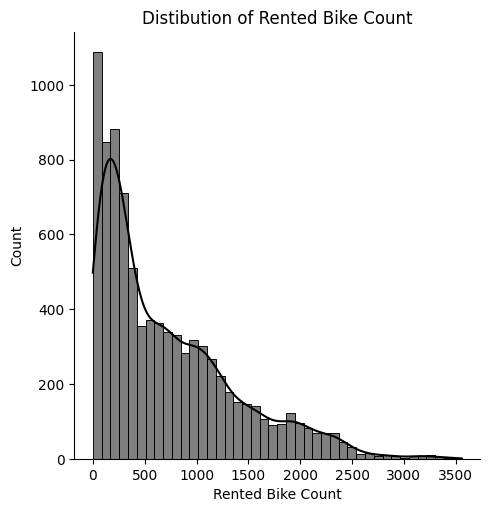

In [28]:
# Chart - 1 visualization code
sns.displot(bike_df['Rented Bike Count'],kde=True,color='black')
plt.title('Distibution of Rented Bike Count')

##### 1. Why did you pick the specific chart?

A displot with KDE was chosen to visualize the distribution of 'Rented Bike Count' because it effectively shows the data's frequency, underlying probability distribution, and potential outliers, making it easy to interpret central tendency, spread, and skewness.

##### 2. What is/are the insight(s) found from the chart?

From the above displot of dependent variable 'Rented Bike Count', we can clearly see that the distribution is positively skewed (Right skewed). It means that distribution is not symmetric around the the mean.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are valuable for demand forecasting, resource allocation, pricing strategies, operational efficiency, and customer satisfaction. Understanding these patterns helps optimize operations, ensure adequate bike availability, and improve overall profitability and customer experience.


#### Chart - 2: Independent Variable Distribution/ Box plot

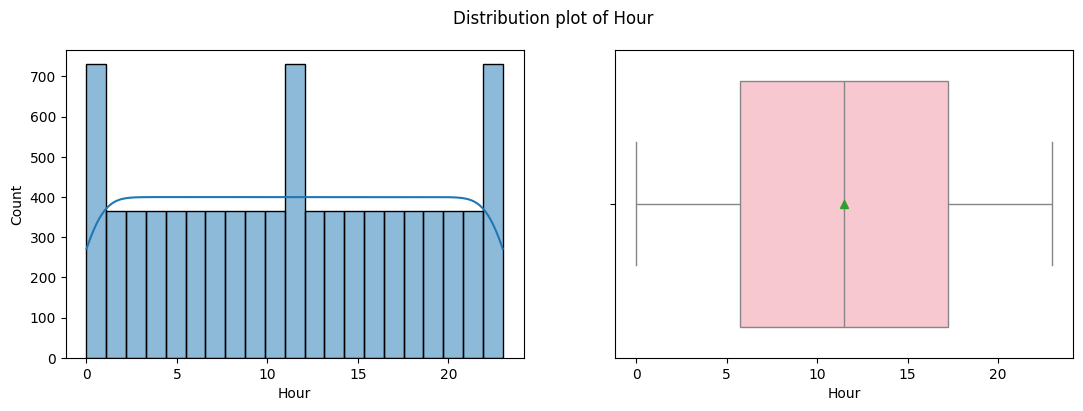

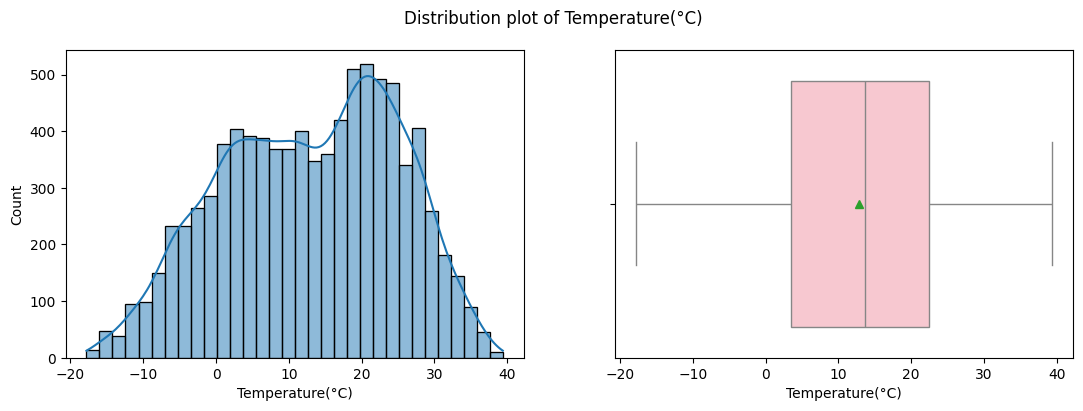

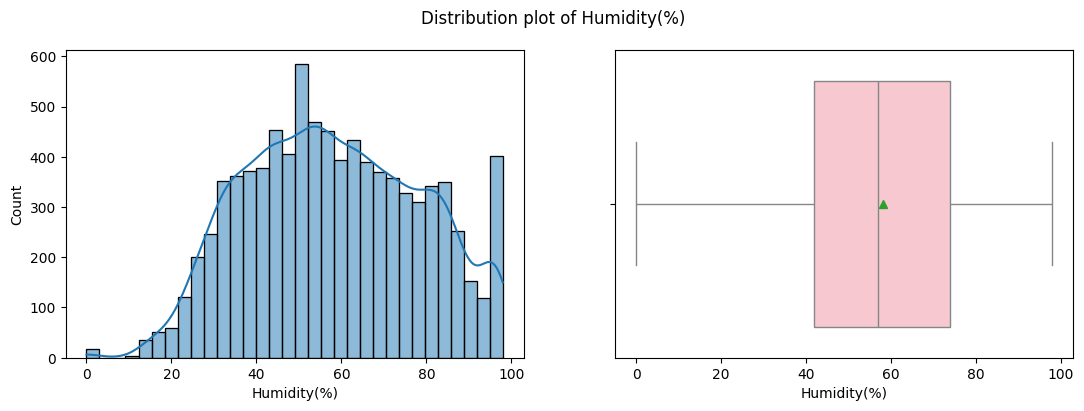

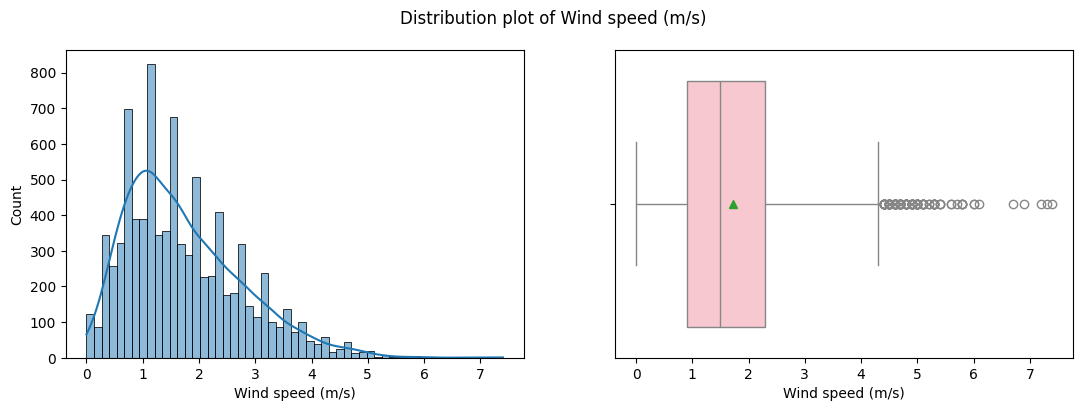

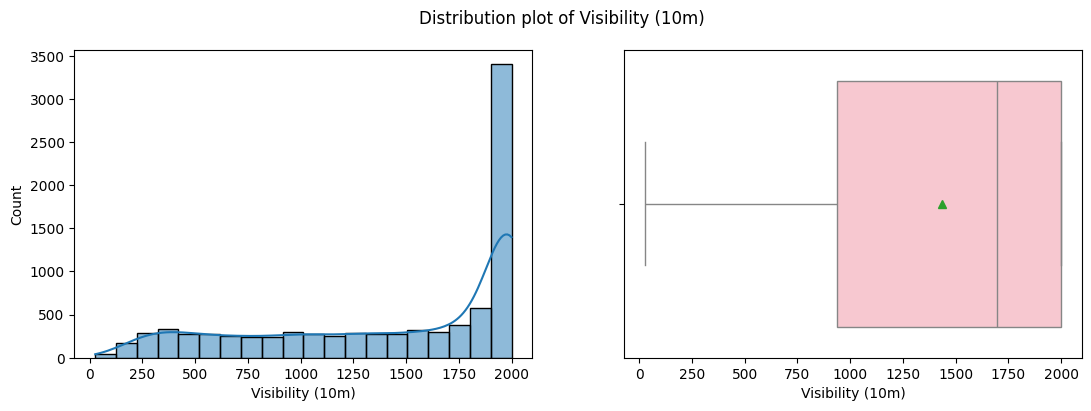

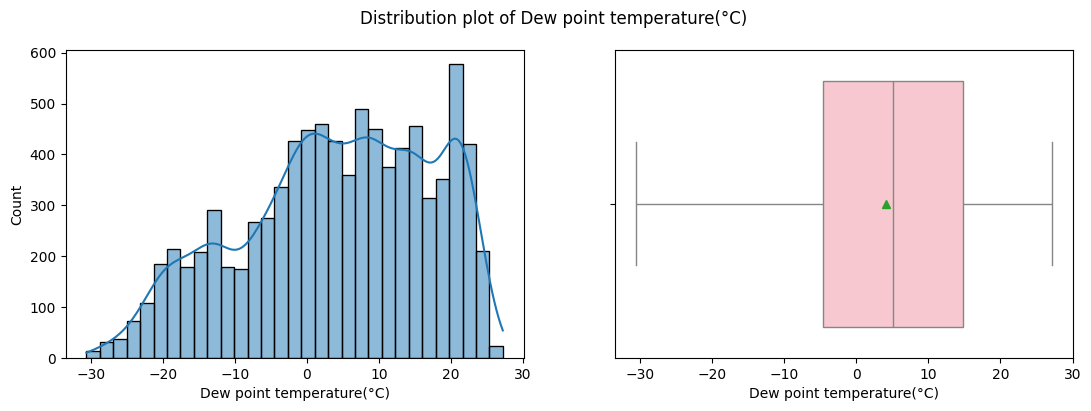

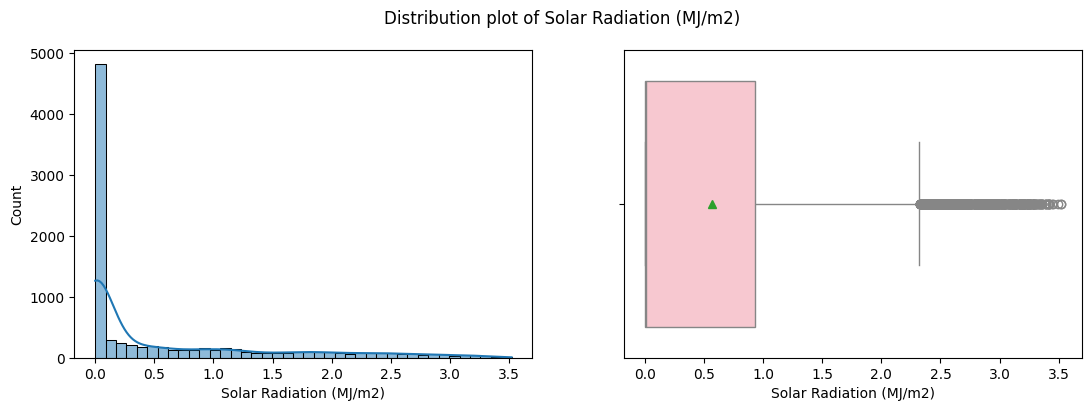

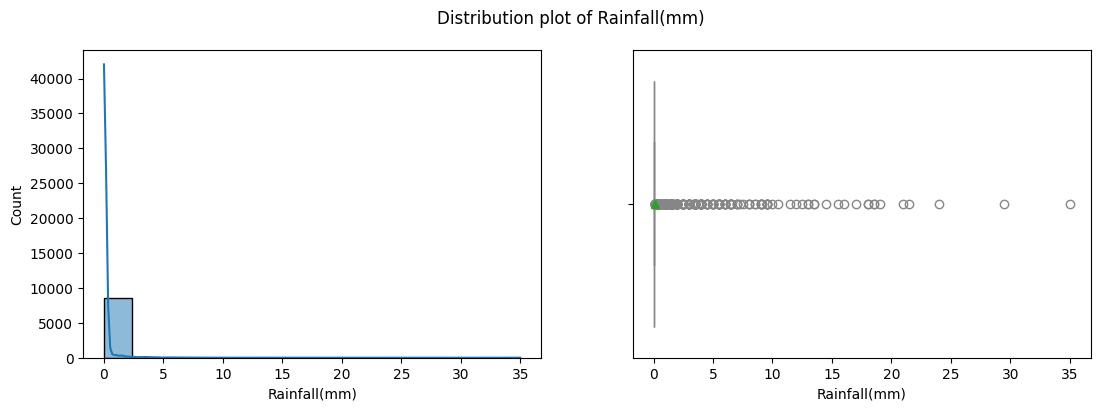

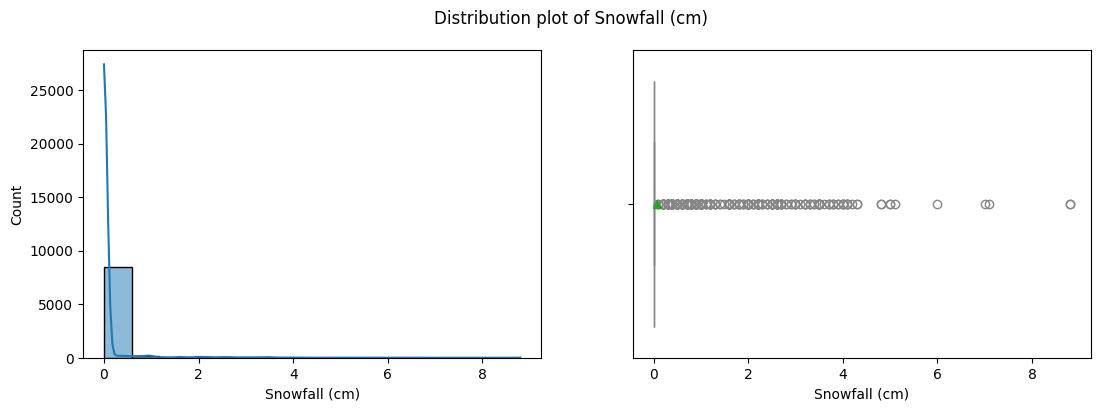

In [29]:
# Chart - 2 visualization code
lis=['Hour','Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)','Snowfall (cm)']
for col in lis:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(bike_df[col], ax = axes[0],kde = True)
    sns.boxplot(bike_df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 12)
    plt.show()


##### 1. Why did you pick the specific chart?

This dual visualization approach provides a thorough understanding of the data distribution and summary statistics. The histogram with a KDE shows the frequency distribution and the underlying probability density of the data, highlighting patterns, skewness, and peaks. The boxplot gives a concise summary of the data, showing the median, quartiles, and potential outliers, as well as the mean when showmeans=True is used. Boxplots are particularly effective for identifying outliers, which can be critical for data cleaning and understanding unusual behavior in the data.


##### 2. What is/are the insight(s) found from the chart?

From the above univariate analysis of all continuous feature variables, we got to know that only temperature and humidity columns are looks normally distributed others shows the different distributions.

Also we can see that there are outlier values in snowfall, rainfall, wind speed & solar radiation columns.

* The outlier values are not extreme,nor unusual.So,we retain these values in our dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying outliers and understanding distributions helps in data cleaning, ensuring more accurate and reliable data for decision-making. Insights into the distribution and spread of features can guide feature transformation and scaling, improving model performance in predictive analytics. Understanding the distribution of key variables like 'Rented Bike Count' helps in devising targeted strategies for inventory management, marketing, and customer engagement. Recognizing patterns and anomalies aids in optimizing operations, such as ensuring bike availability during peak times and improving resource allocation.

In [30]:
bike_df.to_csv('bike_df.csv')

In [31]:
# The number of records belonging to each category
for col in cat_var:
 print('Column :',col)
 print(bike_df[col].value_counts(),'\n')

Column : Hour
Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64 

Column : Seasons
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64 

Column : Holiday
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64 

Column : Functioning Day
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64 

Column : Month
Month
12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: count, dtype: int64 

Column : Days_of_week
Days_of_week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64 

Column : Weekend
Weekend
N    6264
Y    2496
Name: count, 

## ***Basic Conclusions from Univariate Analysis***
- Number of records are mostly similar throughout the seasons.
- More number of records on non-holidaydays & Functioning days of the rental service.
- Bike rentals are fewers on Weekends
- Not much info from hour at the moment.
- The temperature is mostly >0, for now lets consider Seoul on the warmer side.
- Humidity is also moderate but still on warmer side.
- Wind speed is not that extreme.
- Most of the rainfall is <4 mm.
- Snowfall is mostly 0-1 cm and not that extreme in most cases.

# ***Bivariate Analysis***

#### Chart - 3 : Dependent variable with continuous variables

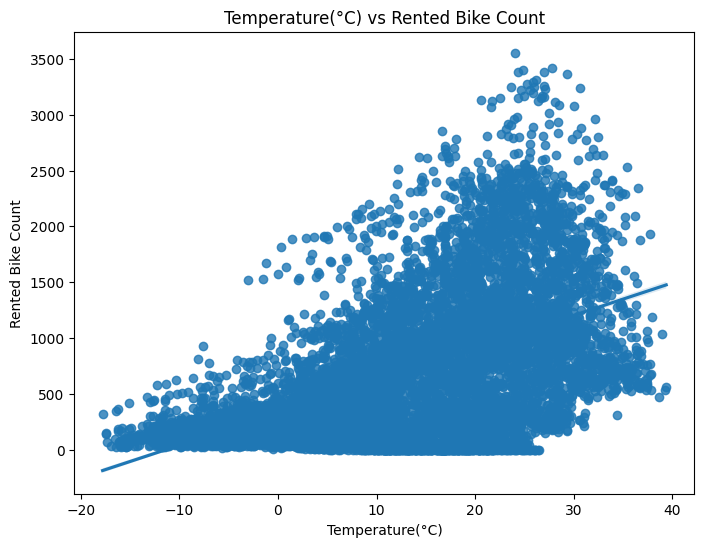

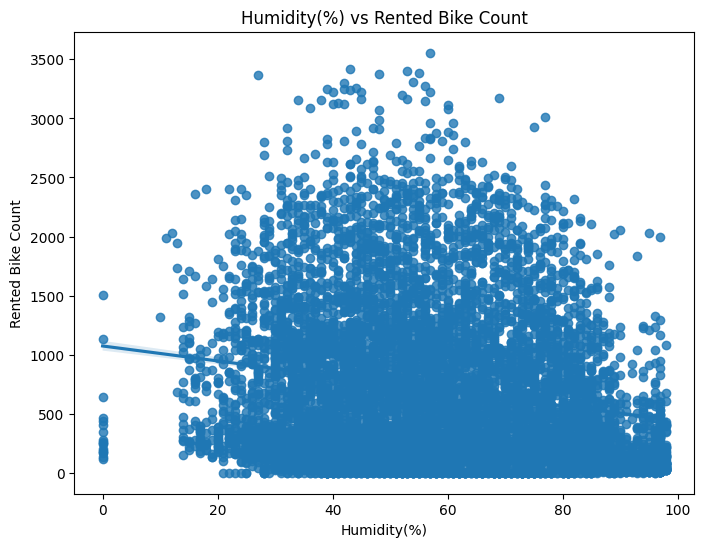

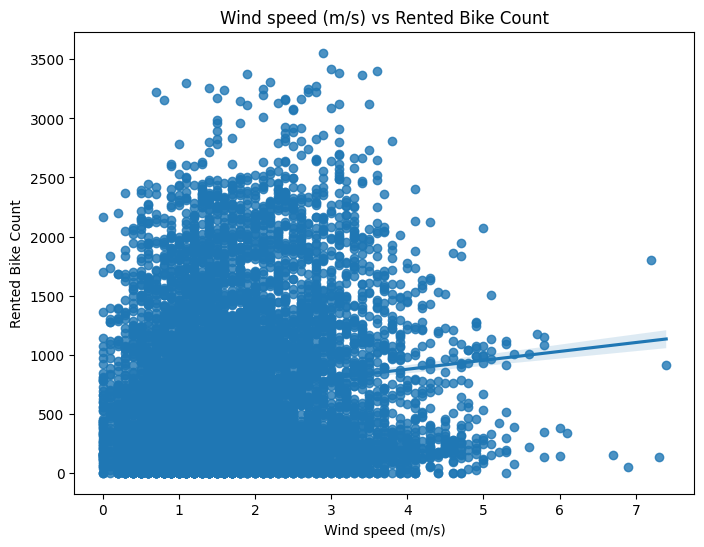

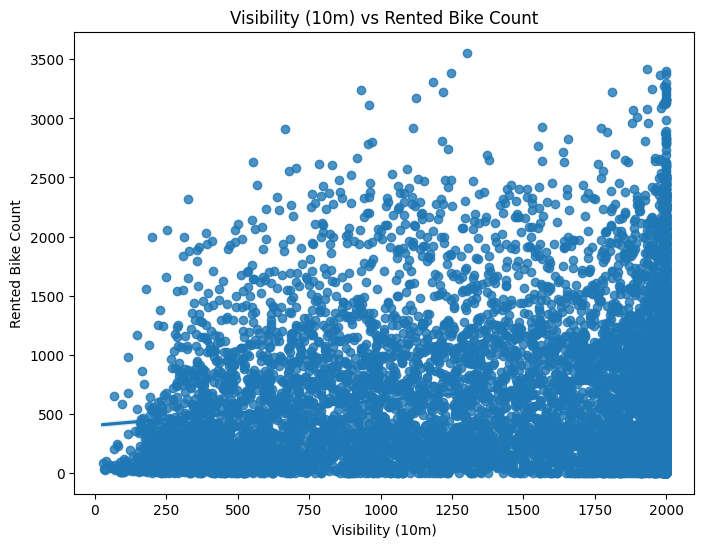

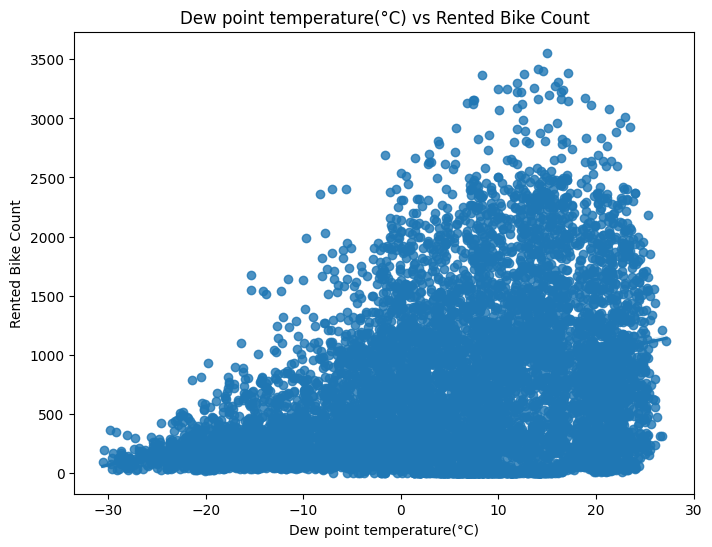

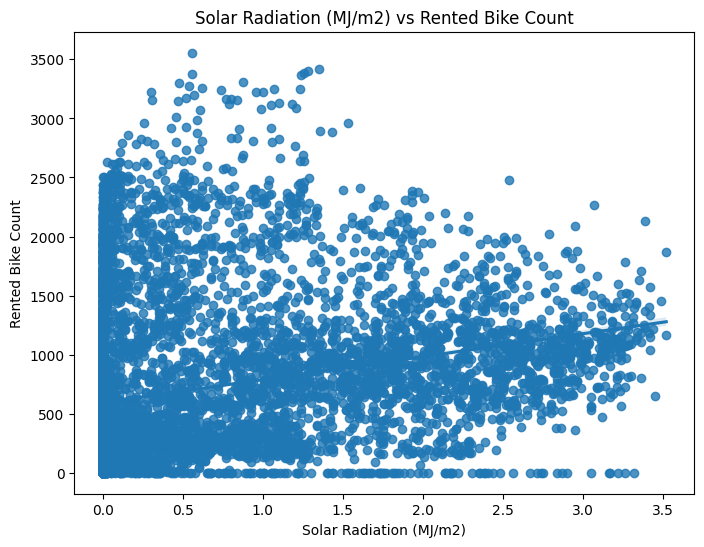

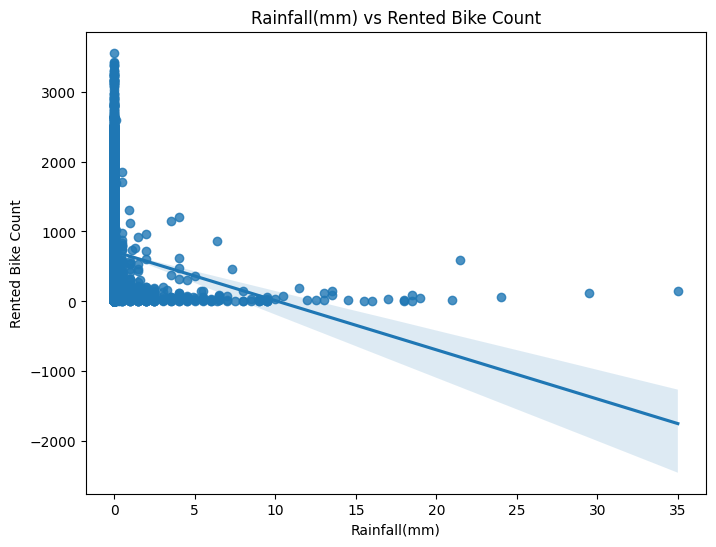

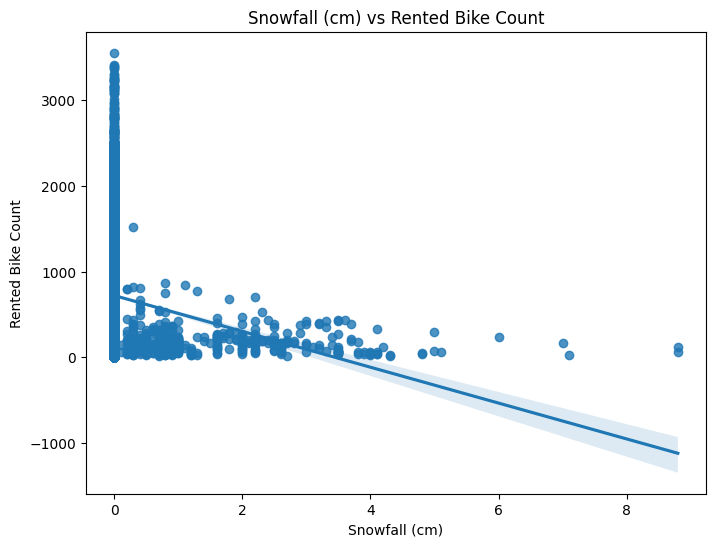

In [32]:
# Chart - 3 visualization code
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(8,6))
  sns.regplot(x=i,y=dependent_variable[0],data=bike_df)
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

The regplot was chosen to visualize the relationship between each continuous variable and the 'Rented Bike Count' because it provides a clear view of how each predictor variable is associated with the target variable. This type of plot not only shows the scatterplot of individual data points, indicating the spread and potential correlation, but also overlays a regression line that helps to understand the trend and strength of the linear relationship. This is essential for identifying which variables might be good predictors for bike rentals.

##### 2. What is/are the insight(s) found from the chart?

From these charts, you can observe the nature and strength of the relationship between each continuous variable and the 'Rented Bike Count'. Positive or negative trends can be seen via the slope of the regression line. If the points are closely clustered around the regression line, it indicates a strong linear relationship, while a more scattered pattern suggests a weaker correlation. Additionally, outliers and heteroscedasticity (variability in the data points) can be identified, which are important for further analysis and model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these charts can significantly impact the business positively. Understanding which variables strongly correlate with bike rentals helps in identifying key drivers of demand, allowing for more precise forecasting and better resource management. For instance, if temperature is found to have a strong positive correlation with bike rentals, the business can prepare for higher demand during warmer periods. This aids in inventory management, staffing, and marketing efforts, ultimately leading to more efficient operations, cost savings, and enhanced customer satisfaction.

#### Chart - 4 : Dependent variable with categorical variables

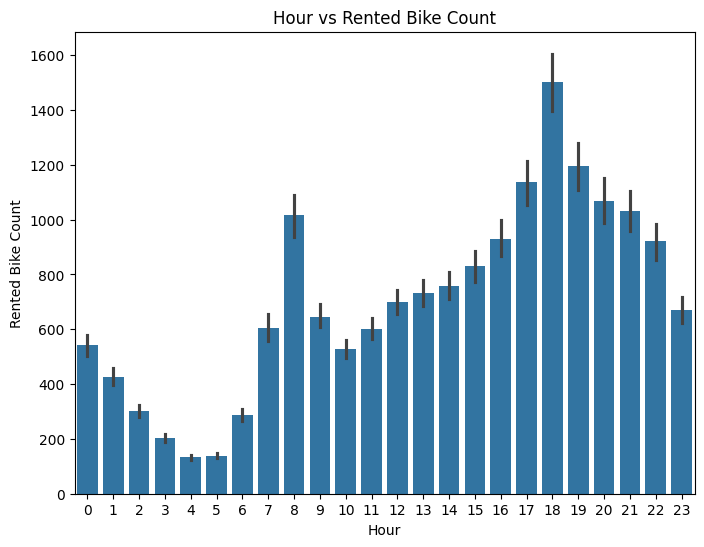

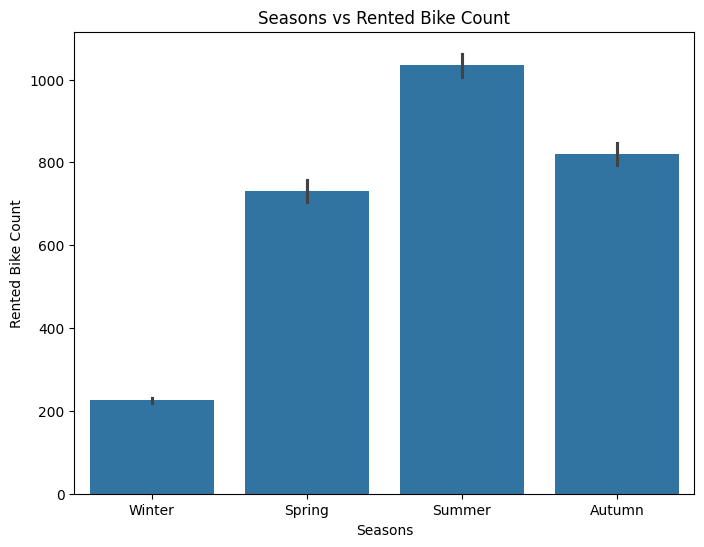

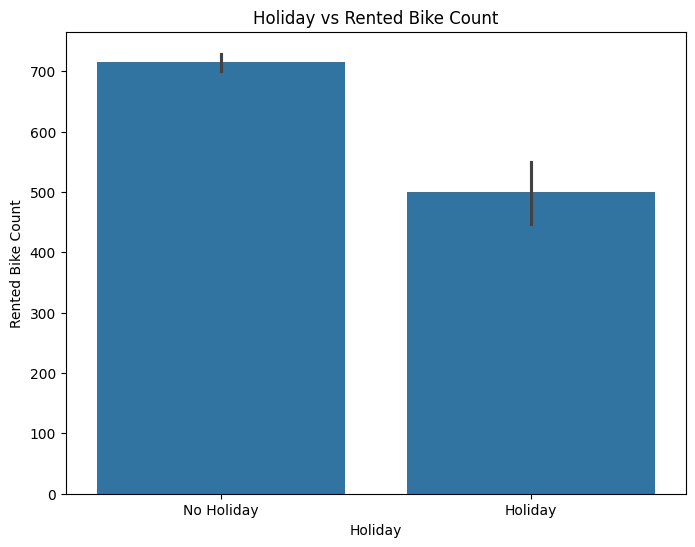

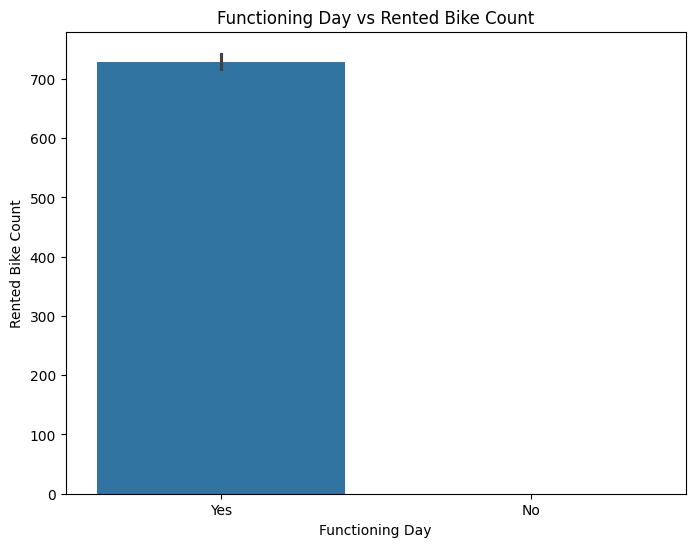

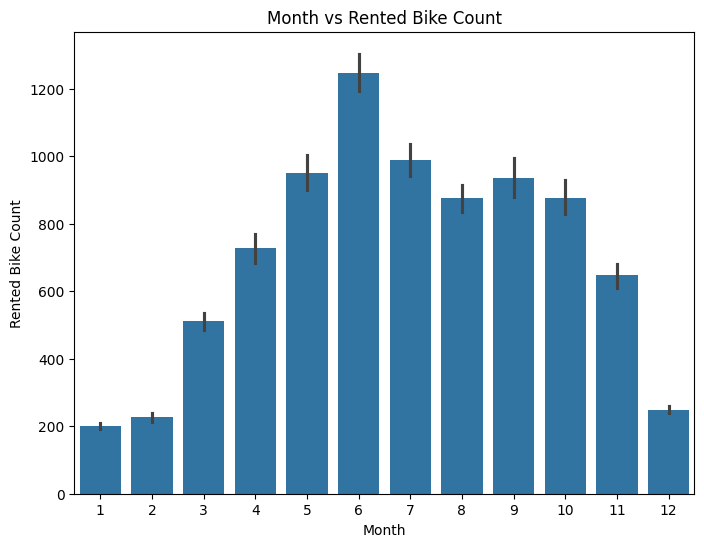

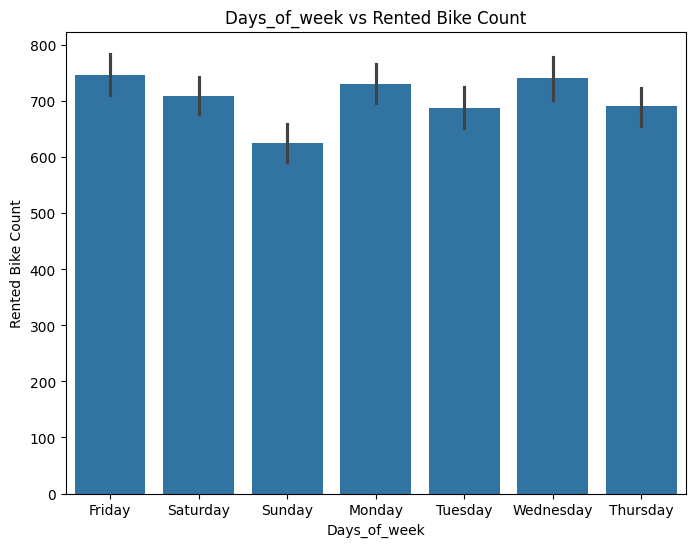

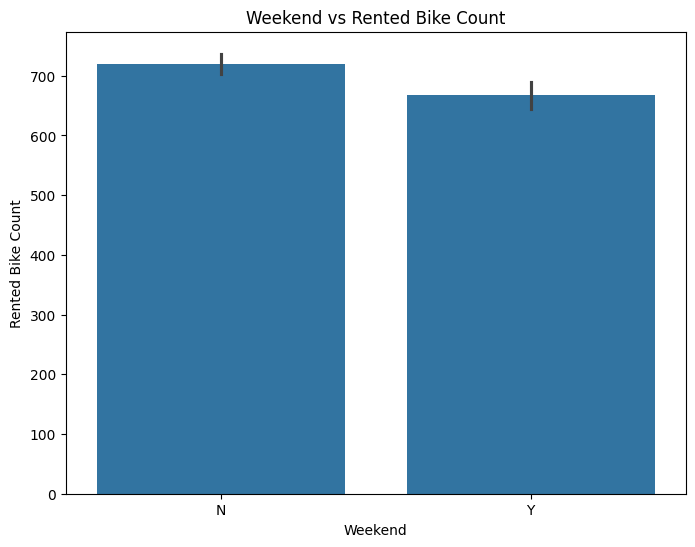

In [33]:
# Chart - 4 visualization code
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(8,6))
  sns.barplot(x=i,y=dependent_variable[0],data = bike_df)
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

The barplot was chosen to analyze the relationship between categorical variables and the 'Rented Bike Count' because it effectively summarizes and compares the mean rental counts across different categories. Bar plots are particularly useful for visualizing categorical data as they clearly show the differences in the target variable's average values across various groups, making it easy to spot trends and differences that could be significant. This type of visualization provides a straightforward way to interpret the impact of categorical variables on the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

From these bar plots, you can derive insights into how different categories affect bike rentals. For example, certain weather conditions, seasons, or holiday statuses might show higher average bike rental counts, indicating their positive influence on demand. Conversely, categories with lower average rentals may indicate less favorable conditions for biking. These insights help identify key factors that drive usage patterns. Additionally, significant differences in means across categories suggest that these categorical variables play a crucial role in influencing the bike rental count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these charts can help create a positive business impact. By understanding how different categorical variables affect bike rentals, the business can tailor its strategies to capitalize on high-demand periods and conditions. For instance, recognizing that bike rentals increase significantly during weekends or holidays can inform marketing campaigns and promotional activities to boost usage further during these times. Similarly, understanding the impact of weather conditions can help in resource allocation and operational planning, ensuring adequate bike availability and maintenance. These actions can enhance customer satisfaction, optimize resource use, and ultimately improve profitability.

#### Chart - 5 : Were rental services offered on non-functional days?

In [34]:
# Chart - 5 visualization code
len(bike_df[bike_df['Functioning Day']=='No'])

295

It is highly unlikely that services will be provided on non-functional days.But since there were few observations (295) recorded on those days,let's check if there were any exceptional cases.

In [35]:
# Calculating the count of rental bikes,number of holidays &non-holidays and number of records for Functioning and Non-Functioning days
bike_df.groupby(['Functioning Day','Holiday']).agg(bikerentalcounts=('Rented Bike Count','sum'),no_of_holidays_nonholidays=('Date',lambda x: x.nunique()),no_of_records=(('Date','count')))

bikerentalcounts  no_of_holidays_nonholidays  \
Functioning Day Holiday                                                    
No              Holiday                    0                           1   
                No Holiday                 0                          12   
Yes             Holiday               215895                          17   
                No Holiday           5956419                         336   

                            no_of_records  
Functioning Day Holiday                    
No              Holiday                24  
                No Holiday            271  
Yes             Holiday               408  
                No Holiday           8057

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

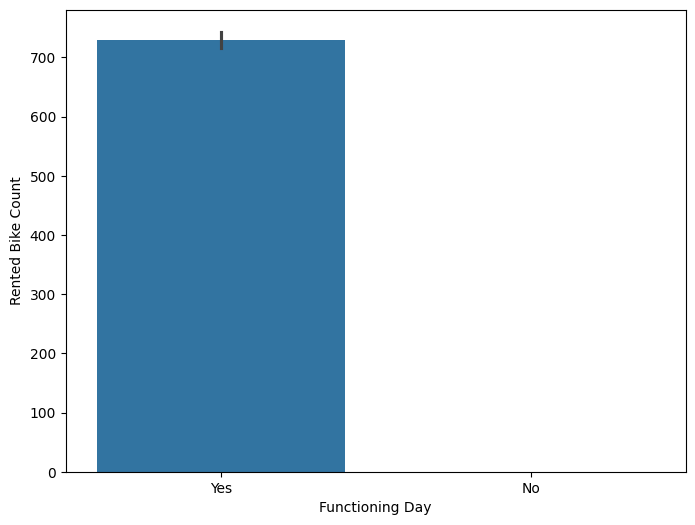

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=bike_df)

##### 1. Why did you pick the specific chart?

The barplot was chosen to visualize the relationship between 'Functioning Day' and 'Rented Bike Count' because it provides a clear comparison of average bike rentals on functioning days versus non-functioning days. Bar plots are ideal for categorical data, as they summarize the mean values of the dependent variable across different categories, making it easy to see if there's a significant difference in bike rentals between functioning and non-functioning days. This helps in quickly identifying the impact of this categorical variable on the target variable.

##### 2. What is/are the insight(s) found from the chart?

* The rental service were functional on most days during the period from Dec 2017 to Nov 2018(only 13 non-functional days)
* Although,we've observed few records on Non-Functioning Day,rental services were not offered on those days(no exceptions)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can help create a positive business impact. Understanding that bike rentals are significantly higher on functioning days underscores the importance of minimizing downtime and ensuring that bikes are well-maintained and available for use. By focusing on improving maintenance operations and reducing non-functioning periods, the business can maximize rental opportunities and revenue. Additionally, this insight can guide operational decisions, such as investing in better maintenance infrastructure or adopting preventive maintenance strategies to enhance bike availability and customer satisfaction, ultimately leading to increased profitability.

#### Chart - 6 : Which are the days on which the rental facility was unavailable?

In [37]:
# Chart - 6 visualization code
non_functioning_days =bike_df.loc[bike_df['Functioning Day']=='No']

#Holiday on which the rental service was unavailable
non_functioning_days.loc[non_functioning_days['Holiday']=='Holiday']['Date'].unique()

<DatetimeArray>
['2018-10-09 00:00:00']
Length: 1, dtype: datetime64[ns]

The holiday on which the rental service was not functioning is Hangeul day.It is a national Korean commemorative day marking the invention and the proclamation of Hangul , the alphabet of the Korean language

In [38]:
non_functioning_days.loc[non_functioning_days['Holiday']=='No Holiday']['Date'].value_counts().to_frame(name = 'Hours_of_non_operation').reset_index().rename(columns={'index':'Date'})

,Date,Hours_of_non_operation
0,2018-04-11,24
1,2018-05-10,24
2,2018-09-18,24
3,2018-09-19,24
4,2018-09-28,24
5,2018-09-30,24
6,2018-10-02,24
7,2018-10-04,24
8,2018-11-03,24
9,2018-11-06,24


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?


The services were not for available for 1 day in the month of April,1 day in May,4 days in September,3 days each in October and November.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 7: What is the likelihood of people renting bikes on holidays and non-holidays?

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

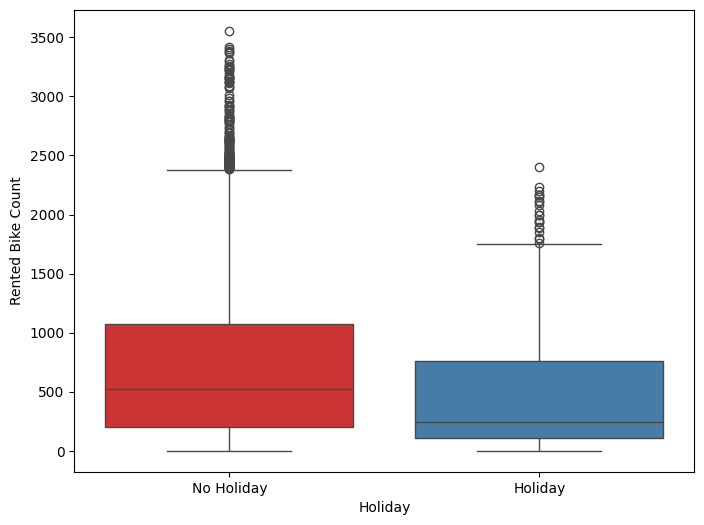

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Holiday',y='Rented Bike Count',data=bike_df,palette='Set1')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* The demand for rented bikes is higher on non-Holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 8 : What is the count of rented bikes during different seasons  over the entire period of observation?

In [40]:
# Finding the total number of bikes rented in each season
season_df=bike_df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()['Rented Bike Count'].to_frame(name = 'season_count').reset_index()

In [41]:
# Finding the total number of bikes rented in each month
month_df=(bike_df.groupby(['Seasons','Month'])['Rented Bike Count'].sum()).to_frame(name = 'month_count').reset_index()

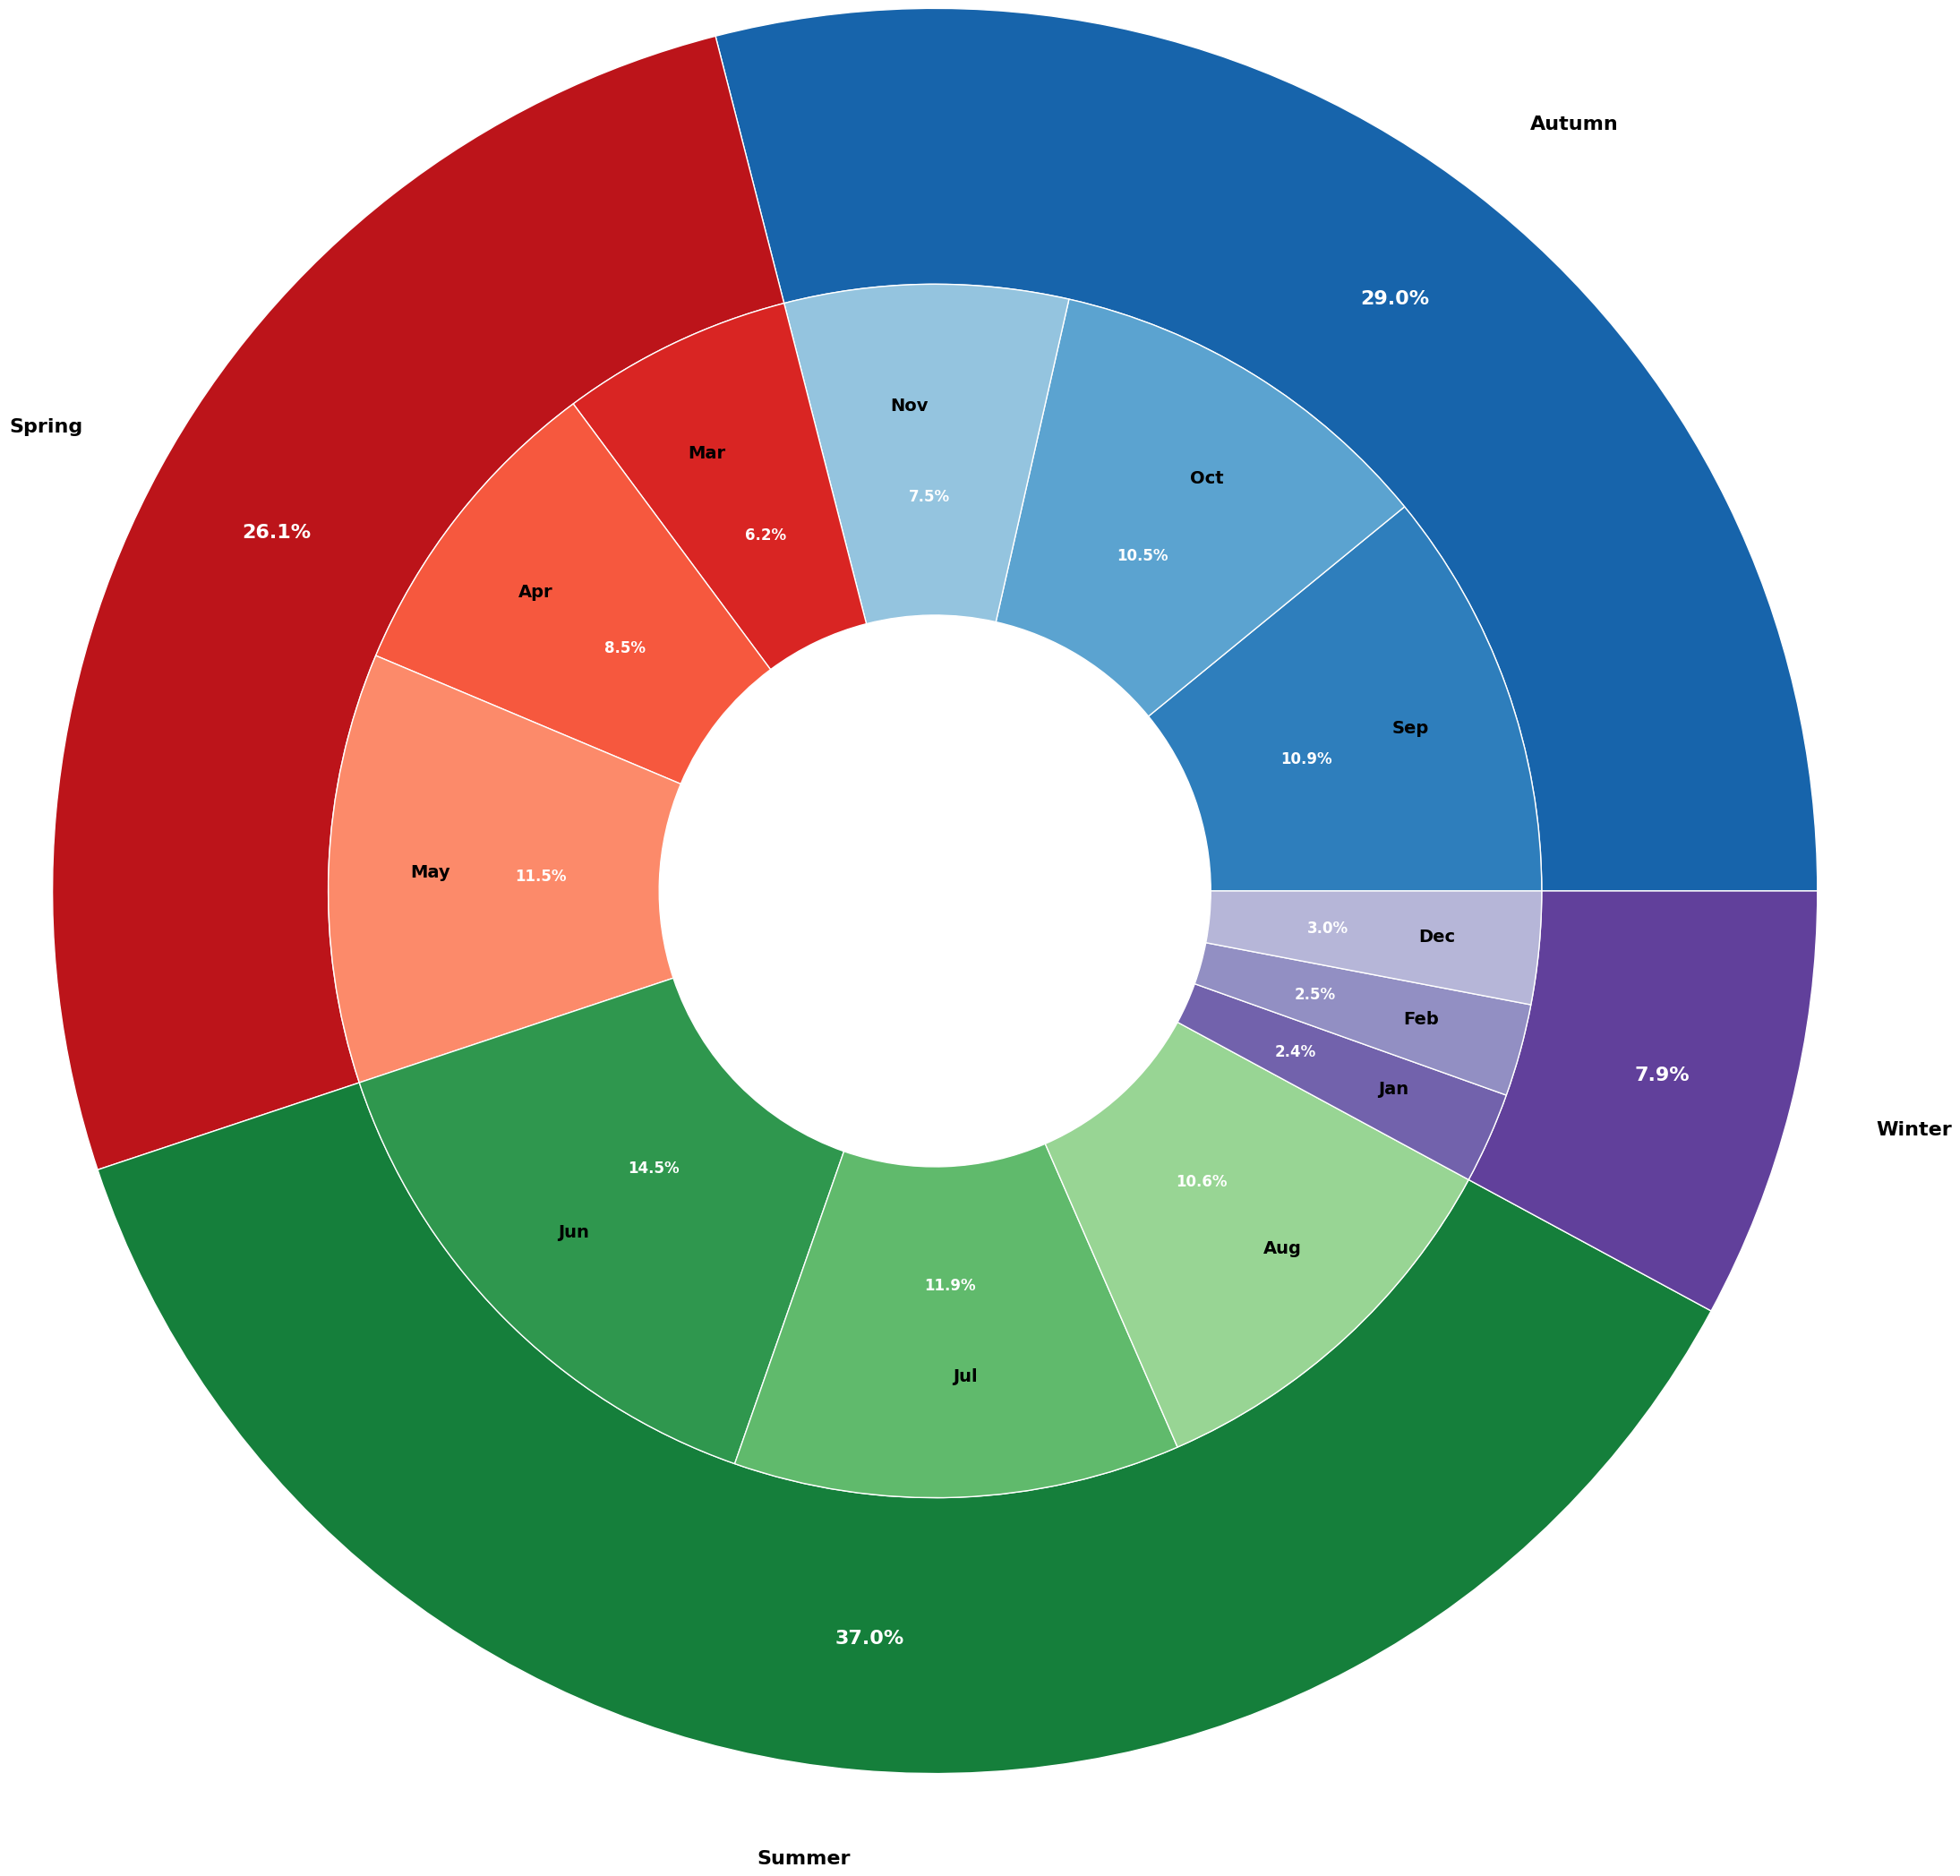

In [42]:
import calendar

# Creating a dictionary to map month numbers to month abbreviations
d = dict(enumerate(calendar.month_abbr))

# Replacing the numerical value of Month with the name of the Month
subgroup_names = month_df['Month'].map(d)

fig, ax = plt.subplots(figsize=(10, 10))  # Adding figsize for better visualization
size = 1
group_names = ['Autumn', 'Spring', 'Summer', 'Winter']
group_size = season_df['season_count']

subgroup_size = month_df['month_count']
a, b, c, d = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

# Setting figure colors
outer_colors = [a(0.8), b(0.8), c(0.8), d(0.8)]
inner_colors = [*a(np.linspace(0.7, 0.4, 3)), *b(np.linspace(0.7, 0.4, 3)), *c(np.linspace(0.7, 0.4, 3)), *d(np.linspace(0.7, 0.4, 3))]

# Creating nested pie chart
patches, texts, pcts = ax.pie(
    group_size,
    radius=3.2,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=group_names,
    autopct='%1.1f%%',
    textprops={'fontsize': 16},  # Use only 'fontsize'
    labeldistance=1.1,
    pctdistance=0.85
)
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)

patches1, texts1, pcts1 = ax.pie(
    subgroup_size,
    radius=3.2 - size,
    colors=inner_colors,
    labels=subgroup_names,
    wedgeprops=dict(width=1.2, edgecolor='w'),
    autopct='%1.1f%%',
    textprops={'fontsize': 14},  # Use only 'fontsize'
    labeldistance=0.8,
    pctdistance=0.65
)
plt.setp(pcts1, color='w', fontweight='bold', fontsize=12)
plt.setp(texts1, fontweight=600)

ax.set(aspect="equal")
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* The demand for rental bikes is lowest during Winters(Dec-Feb),highest during Summers(June-August)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 9 : What is the demand for rental bikes during different days of the week?

<Axes: xlabel='Days_of_week', ylabel='Rented Bike Count'>

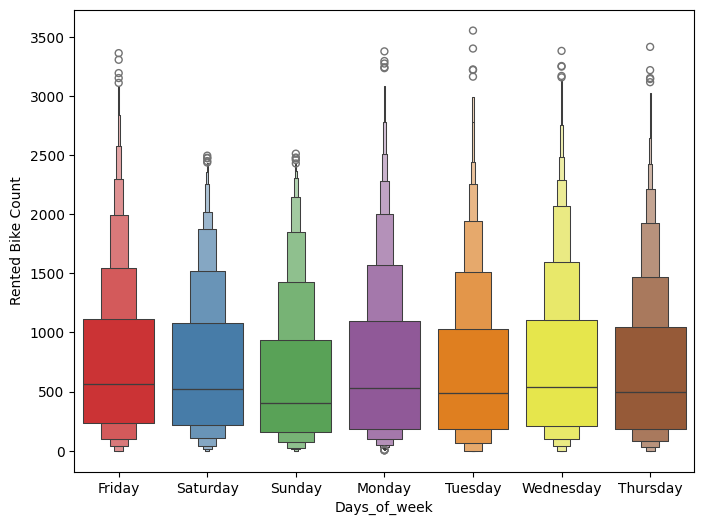

In [43]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Days_of_week',y='Rented Bike Count',data=bike_df,palette='Set1')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?


* Least demand on Sunday,Slightly higher demand on Friday
* More demand on weekdays than weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 10 : What is the demand for rental bikes during weekdays and weekends?

<Axes: xlabel='Weekend', ylabel='Rented Bike Count'>

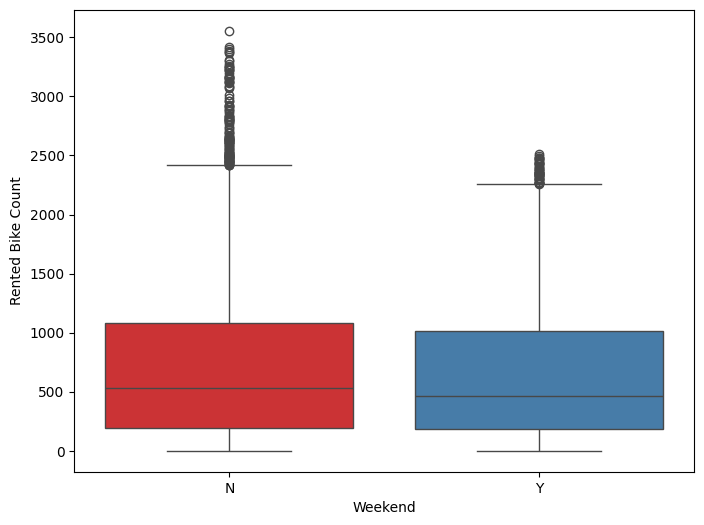

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Weekend',y='Rented Bike Count',data=bike_df,palette='Set1')

In [45]:
bike_df.groupby(['Weekend'])['Rented Bike Count'].mean()

Weekend
N    719.448914
Y    667.342147
Name: Rented Bike Count, dtype: float64

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* The average demand for rental bikes is lower on Weekends(Sat-Sun) as compared to Weekdays(Mon-Fri).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 11 : What is the demand for rental bikes during different hours of the day?

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

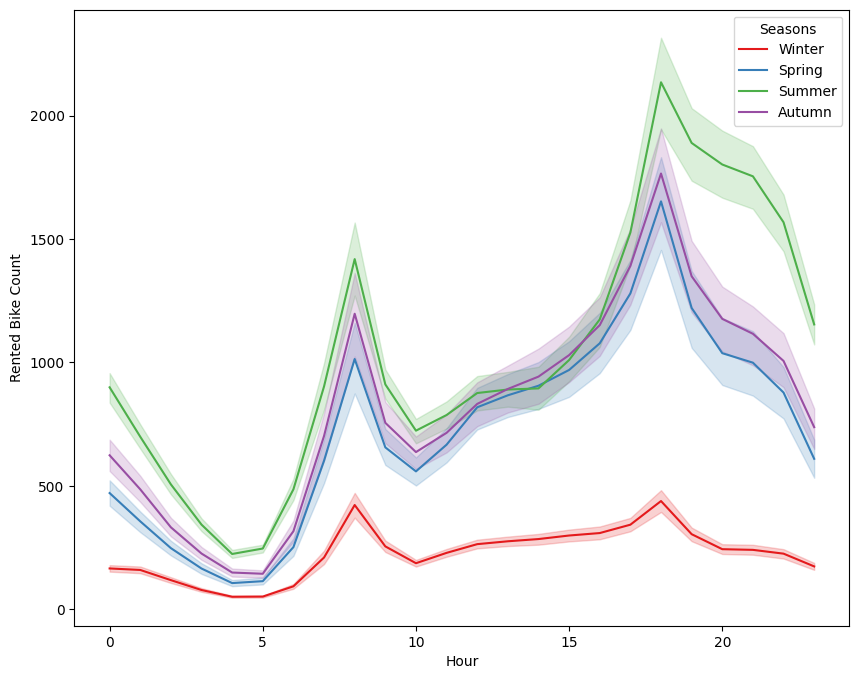

In [46]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Hour',y='Rented Bike Count',data=bike_df,palette='Set1',hue='Seasons',lw=1.5)

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* The demand for rental bikes  peaks at 8 (8:00 am) and 18 (6:00 PM ).
* This peak in demand coincides with opening and closing hours of various institutions and offices.
* The demand for rental bikes increases steadily after 10:00 AM and continues till 6:00 PM
* The demand for bikes is least during the early hours (1:00 AM to 6:00 AM)
* Regardless,of the seasons,this has been the general trend noticed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 12 : What is the variation of  Rented bikes count over the entire period of observation based on various factors?

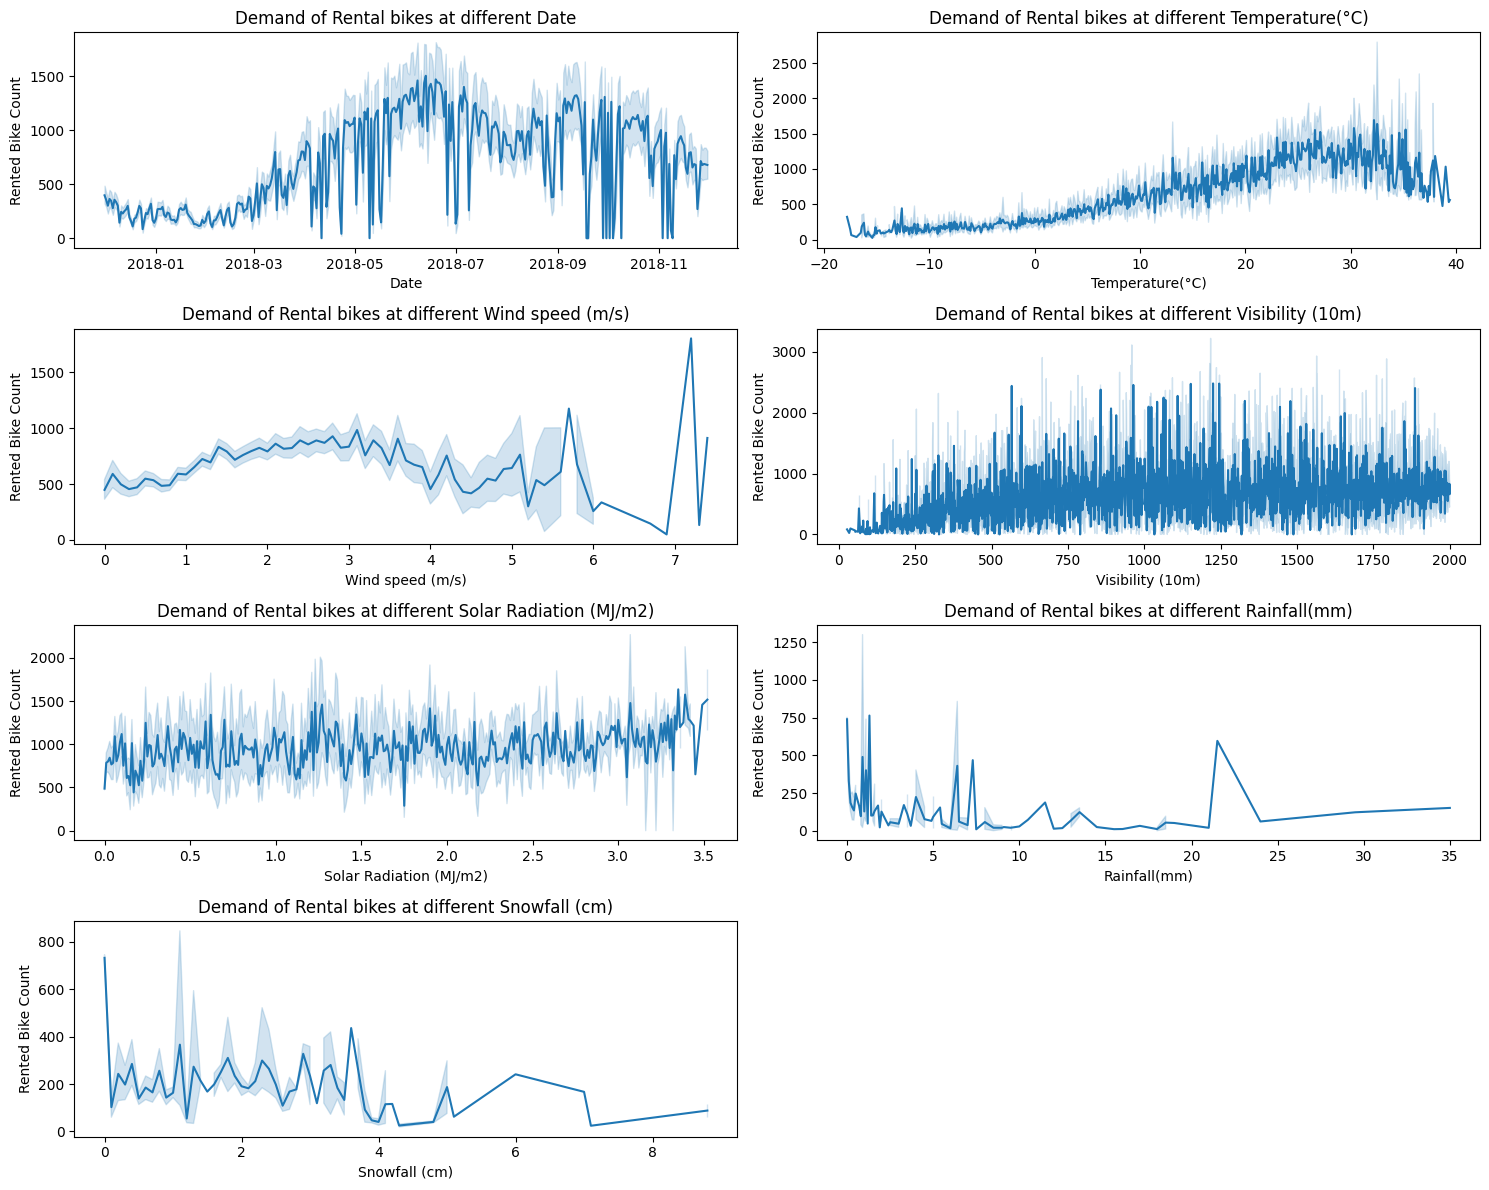

In [45]:
fig = plt.figure(figsize=(15,12))
c=1
cont = ['Date','Temperature(°C)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
for i in cont:
  plt.subplot(4,2,c)
  sns.lineplot(x=i,y='Rented Bike Count',data=bike_df,palette='inferno')
  plt.title('Demand of Rental bikes at different {}'.format(i))
  c = c + 1
plt.tight_layout()

Inspecting the observations where there is a peak in demand for bikes regardless of the weather conditions

In [47]:
#1.Rainfall
bike_df[(bike_df['Rainfall(mm)'] >=20) & (bike_df['Rainfall(mm)'] <=25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Days_of_week,Year,Day,Weekend
5034,2018-06-28,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,6,Thursday,2018,28,N
5132,2018-07-02,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes,7,Monday,2018,2,N
6524,2018-08-29,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes,8,Wednesday,2018,29,N


* These are Working days

In [49]:
bike_df[(bike_df['Snowfall (cm)'] >=5) & (bike_df['Snowfall (cm)'] <=8)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Days_of_week,Year,Day,Weekend
420,2017-12-18,62,12,-1.8,83,1.2,351,-4.3,0.09,1.1,5.1,Winter,No Holiday,Yes,12,Monday,2017,18,N
421,2017-12-18,76,13,-0.9,84,1.2,333,-3.2,0.09,0.0,5.0,Winter,No Holiday,Yes,12,Monday,2017,18,N
8601,2018-11-24,24,9,0.3,97,3.0,34,-0.1,0.00,9.1,7.1,Autumn,No Holiday,Yes,11,Saturday,2018,24,Y
8604,2018-11-24,167,12,2.5,84,1.9,1538,0.0,0.40,1.8,7.0,Autumn,No Holiday,Yes,11,Saturday,2018,24,Y
8605,2018-11-24,241,13,2.6,83,1.9,1774,0.0,0.84,0.0,6.0,Autumn,No Holiday,Yes,11,Saturday,2018,24,Y
8606,2018-11-24,298,14,3.0,82,1.7,1589,0.2,0.55,0.0,5.0,Autumn,No Holiday,Yes,11,Saturday,2018,24,Y


* These are Working days

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?


*   **Temperature vs Bike count plot** : The demand is higher during warmer temperatures (25°C-30°C)
*   **Windspeed vs Bike count plot** : The demand for rental bikes is   relatively uniform over all windspeeds upto 5 m/s .Beyond that speed,we observe a higher demand for bikes.
*   **Visibility vs Bike count plot** : The count of bikes rented is few on times when the visibility is extremely low,less than 1000m.
*   **Solar radiation vs Bike count plot**:There is an overall increase in the demand with increase in Solar radiation.
*   **Rainfall vs Bike count plot** : The peak between 20 mm and 25 mm seems out of place,on refering to the dataset we find that such observations are recorded during Summer Season.However,people still continue to opt for rental bikes,since they have to go to work (No Holiday).
*   **Snowfall vs Bike count plot** : The demand for bikes is comparatively lower when the snowfall received is 4 cm and above.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 13 : What are the factors which influence the demand for rental bikes during a day?

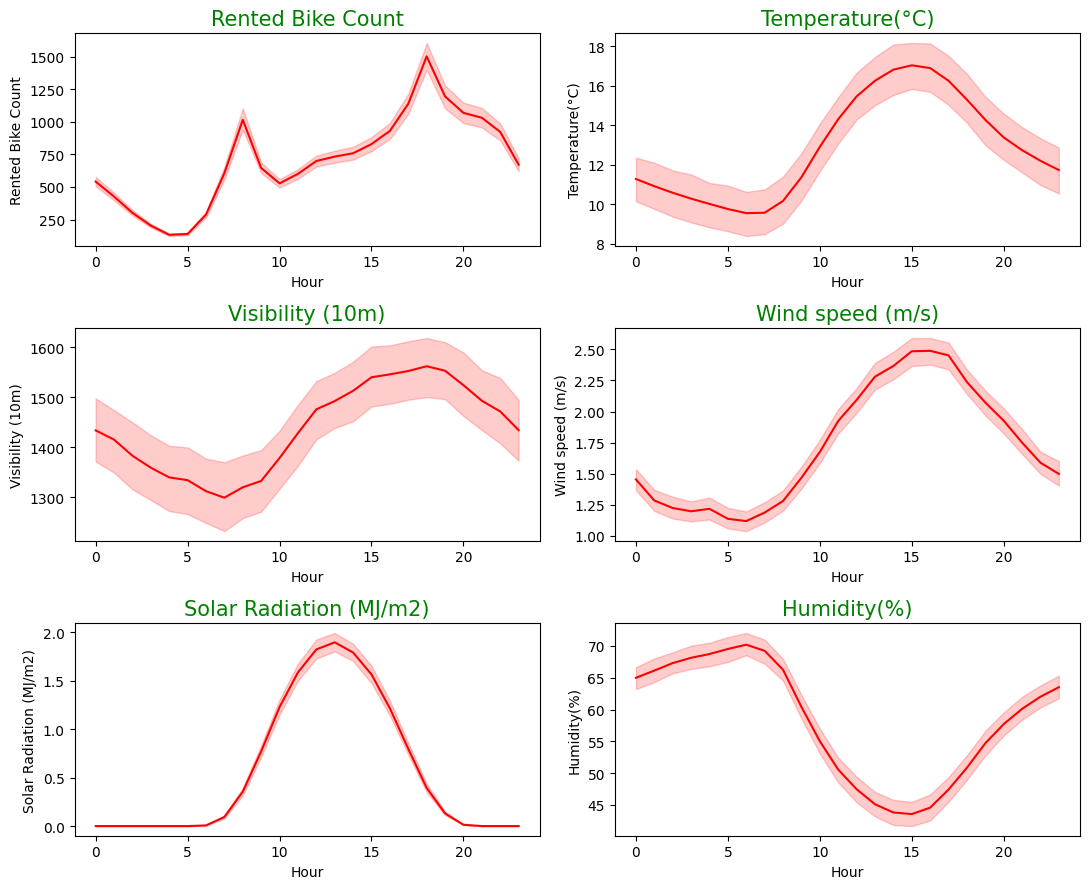

In [50]:

fig = plt.figure(figsize=(11,9))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)']
for i in columns :
    plt.subplot(3,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bike_df, x='Hour', y=i, color='r')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* Temperature, visibility, windspeed, and humidity appear to be positively associated to the hourly demand for rental bikes.
* The rented bike counts are highest during the hours from 7:00 AM to 20.00 (8:00 PM), when the temperature is highest, there is the most visibility, windspeed, and humidity is lowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 14 : What are the factors which influence the demand for rental bikes during different months?

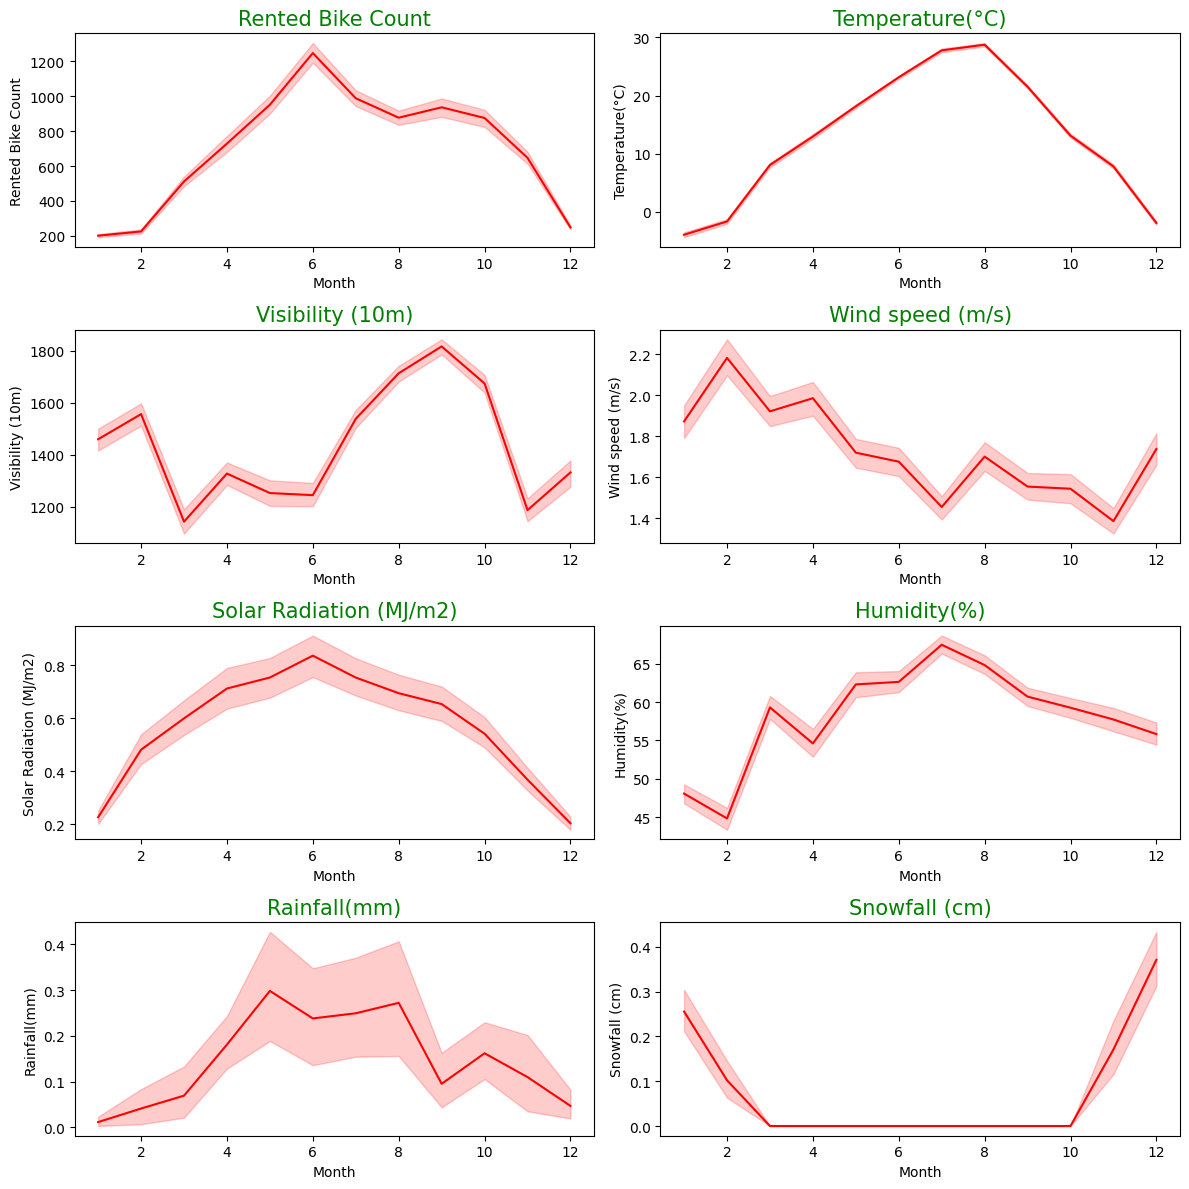

In [51]:
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)','Rainfall(mm)','Snowfall (cm)']
for i in columns :
    plt.subplot(4,2, c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bike_df, x='Month', y=i, color='r')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* The monthly count of rented bikes is positively associated with Temperature.
* Snowfall movement coincides with season, with heavy snowfall from December to February throughout the winter season. There's a decline in count of rented bikes during these months.
* Rainfall tends to be more frequent in Seoul from June to August, during the summer season.However,this has not lead to decline in demand for rental bikes during those months.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 15 : What are the factors which influence the demand for rental bikes during various seasons of the year?

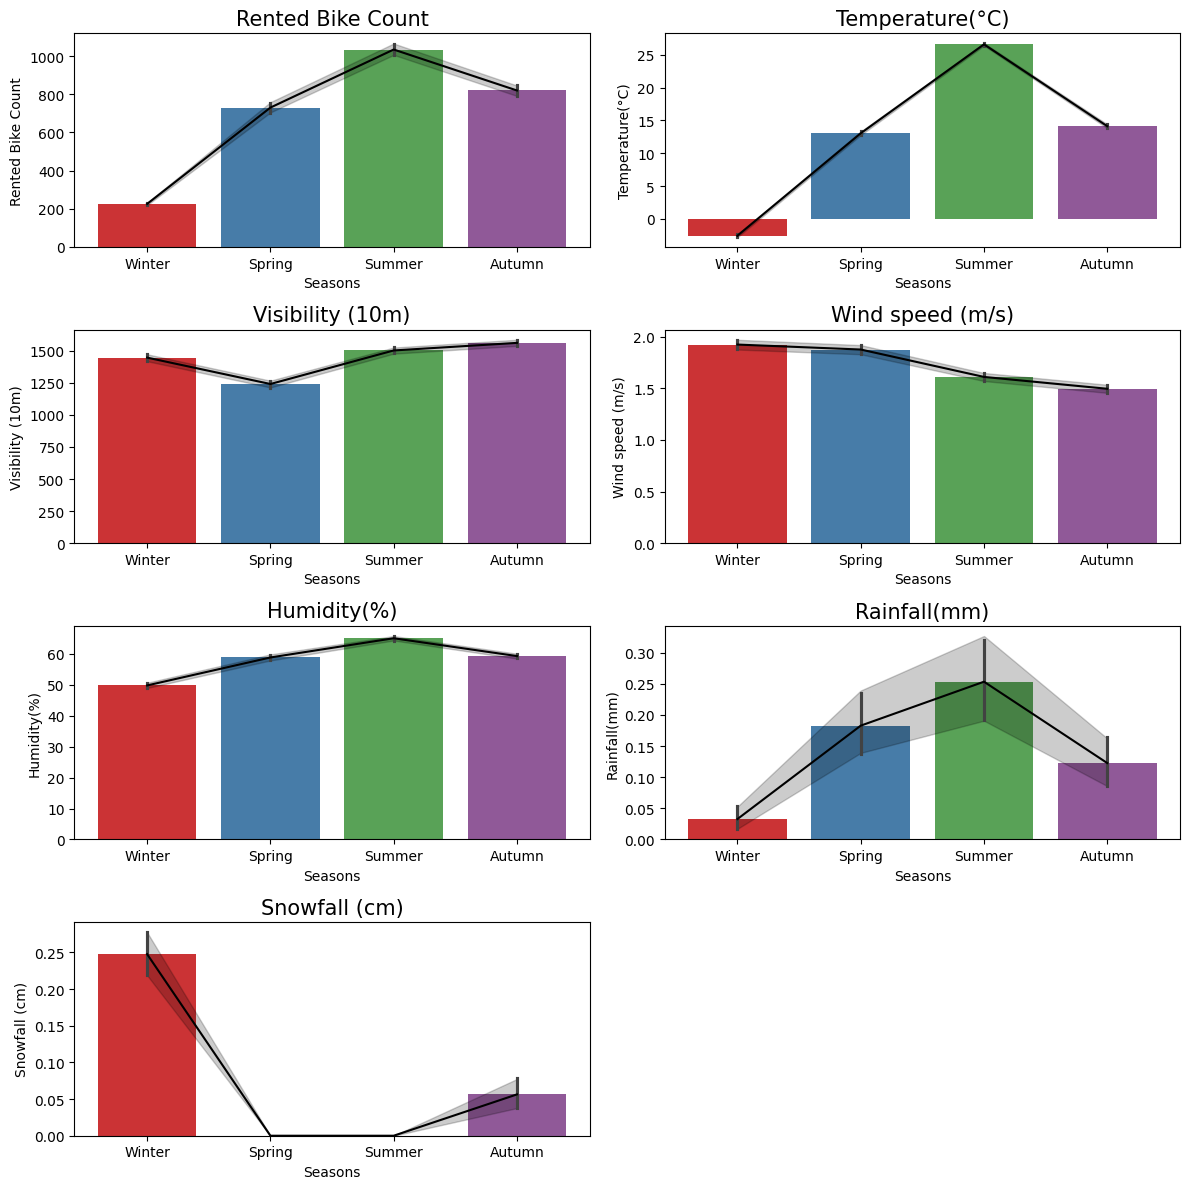

In [52]:
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)']
for i in columns :
    plt.subplot(4,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="black")
    sns.barplot(data=bike_df, x='Seasons', y=i, palette='Set1')
    sns.lineplot(data=bike_df, x='Seasons', y=i, color='black')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* It is evident that the seasonal demand for rental bikes is positively associated with temperature, solar radiation ,rainfall ,humidity and is negatively related with Snowfall received.
* Therefore,the demand is highest during Summer season and least during winters



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 16 - Correlation Heatmap

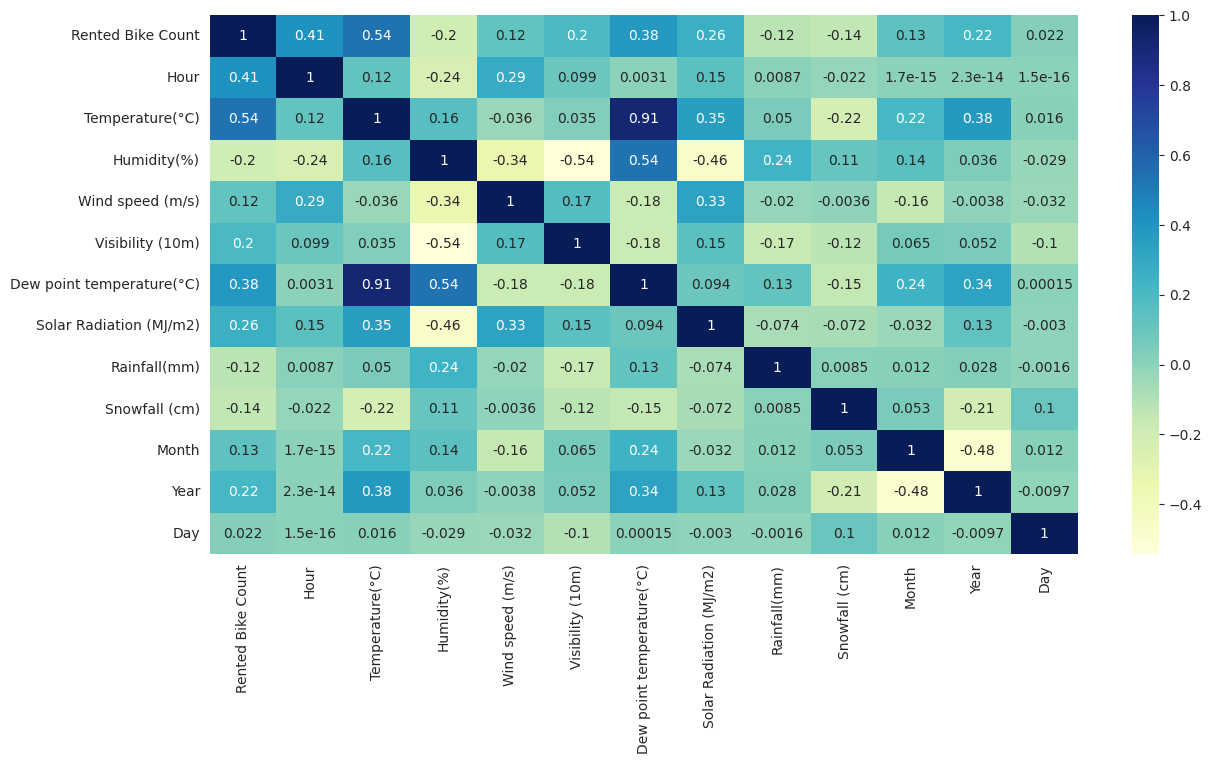

In [56]:
# Select only numeric columns for correlation matrix
numeric_cols = bike_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_cols.corr()

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14,7))
    ax = sns.heatmap(corr , annot = True, cmap="YlGnBu")

In [53]:
# Correlation Heatmap visualization code
corr = bike_df.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14,7))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

ValueError: could not convert string to float: 'Winter'

##### 1. Why did you pick the specific chart?

A heatmap provides a visual representation of correlation coefficients between pairs of variables.Each cell in the table shows the correlation between two variables.

##### 2. What is/are the insight(s) found from the chart?

* Dew point temperature is strongly correlated with temperature.
* Temperature,Hour shares a stronger correlation with Rented Bike count.


#### Chart - 17 - Pair Plot

##### 1. Why did you pick the specific chart?

Pairplots offer a quick overview of the relationships between all pairs of variables in a dataset. Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

## **Basic Conclusions from Bivariate Analysis**

* Temperature and Hour have a strong correlation with the count of rented bikes.
* Dew point temperature is highly positively correlated to the Temperature.
* During the period from Dec 2017 to Nov 2018,bike rental facilities were available on most days.The service was unavailable only for 13 days.
* The demand for rental bikes is higher on Regular days(Non-Holidays) .
* There is more demand for rental bikes on Weekdays than on Weekends.
* The peak demands for rental bikes occur on the opening (8-9 AM) and closing times (6-7pm) of offices and institutions.
* There is a significant drop in the number of rented bikes during Winters(Dec-Feb) because it's freezing cold!
* The demand for bikes increases during warmer temperatures,which is why there's maximum count of rented bikes during the Summer season.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

#### 2. Lower Casing

#### 3. Removing Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

#### 5. Removing Stopwords & Removing White spaces

#### 6. Rephrase Text

#### 7. Tokenization

#### 8. Text Normalization

##### Which text normalization technique have you used and why?

#### 9. Part of speech tagging

#### 10. Text Vectorization

##### Which text vectorization technique have you used and why?

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

##### What data splitting ratio have you used and why?

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

## ***7. ML Model Implementation***

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***